# ***NEURAL NETS MODEL***



# **DATA EXPLORATION AND CLEANING**

In [1]:
# Import necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import torch as t
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import statsmodels.api as sm
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import file
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
# Load data
data = pd.read_csv('diabetes.csv')
data.head(3)

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65.0,126.0,2013-06-11 00:00:00,31.0,2013-06-11 00:00:00,1.7,2013-06-14 00:00:00,1.1,2013-06-14 00:00:00,5.4,2013-06-14 00:00:00,2.3,2013-06-14 00:00:00,5.8,2013-06-14 00:00:00,1.0,3.8,2013-06-14 00:00:00,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,4.001000e+15,NaN,NaN,No
1,62.0,135.0,2014-06-19 00:00:00,25.8,2014-10-17 00:00:00,2.5,2014-05-28 00:00:00,1.4,2014-05-28 00:00:00,5.8,2014-10-25 00:00:00,1.4,2014-05-28 00:00:00,5.4,2014-05-28 00:00:00,1.0,4.5,2014-05-28 00:00:00,0.0,NaN,0.0,NaN,1.0,2014-01-27 00:00:00,0.0,NaN,0.0,NaN,FUROSEMIDE,2014-06-19 00:00:00,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,4.001000e+15,NaN,NaN,No
2,63.0,133.0,2012-07-31 00:00:00,30.9,2011-12-01 00:00:00,1.7,2012-06-01 00:00:00,NaN,NaN,6.1,2012-06-01 00:00:00,0.8,2012-06-01 00:00:00,5.6,2012-06-01 00:00:00,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,2014-05-21 00:00:00,0.0,NaN,1.0,2005-04-08 00:00:00,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11 00:00:00,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,1.001000e+15,NaN,NaN,No


In [4]:
# Checking the data types
data.dtypes

Age_at_Exam                                float64
sBP                                        float64
sBP_Date                                    object
BMI                                        float64
BMI_Date                                    object
LDL                                        float64
LDL_Date                                    object
HDL                                        float64
HDL_Date                                    object
A1c                                        float64
A1c_Date                                    object
TG                                         float64
TG_Date                                     object
FBS                                        float64
FBS_Date                                    object
FBS>DM                                     float64
Total_Cholesterol                          float64
Total_Cholesterol_Lab_Date                  object
Diabetes                                   float64
DM_OnsetDate                   

In [5]:
# Remove rows with duplicate values in 'Patient_ID'
data = data.drop_duplicates(subset=['Patient_ID'], keep='last')

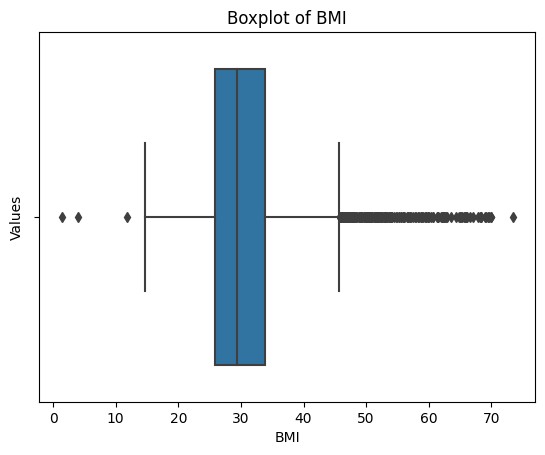

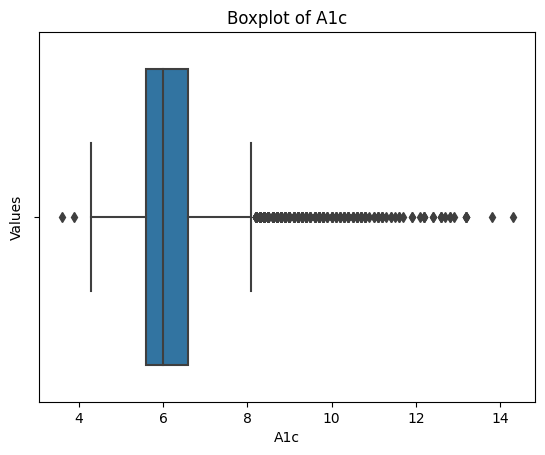

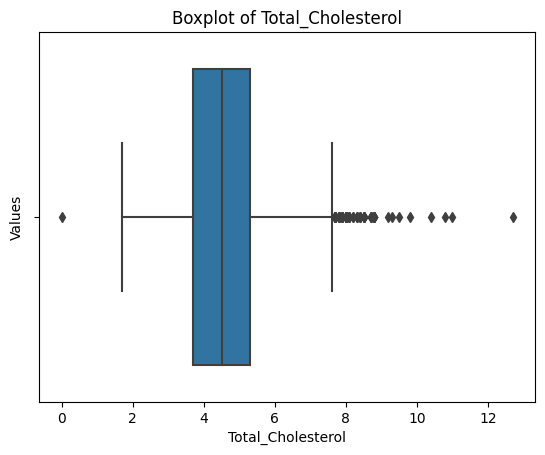

In [6]:
# Specify columns to plot
columns_to_plot = ['BMI', 'A1c', 'Total_Cholesterol']

# Create boxplot
for column in columns_to_plot:
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

In [7]:
# Boxplot shows that there are some data values outside acceptable ranges for BMI and A1c. Drop those observations
data = data[data.BMI > 10]
data = data[data.BMI < 60]
data = data[data.A1c > 3]
data = data[data.A1c < 17.8]

In [8]:
# Checking for missing data, by counting the number of missing values in each column
missing_value_counts = data.isnull().sum()
missing_value_counts

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          48
LDL_Date                                      0
HDL                                          59
HDL_Date                                     52
A1c                                           0
A1c_Date                                      0
TG                                           49
TG_Date                                      39
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           172
Total_Cholesterol_Lab_Date                  163
Diabetes                                      0
DM_OnsetDate                               4014
Depression                              



---


Our conceptual model based on prior literature search is to use HTN, BMI, A1c,total cholesterol, and sex as our features.

After checking for missing data, we see that total cholesterol has 172 missing


---



Summary for Rows without Missing Data:
       Age_at_Exam          sBP          BMI          LDL          HDL  \
count  7801.000000  7797.000000  7801.000000  7763.000000  7753.000000   
mean     62.757211   130.303450    30.240533     2.576246     1.329988   
std      13.291940    16.991253     6.387016     0.958927     0.408074   
min      18.000000    60.000000    11.800000     0.100000     0.200000   
25%      54.000000   120.000000    25.800000     1.900000     1.000000   
50%      63.000000   130.000000    29.300000     2.500000     1.300000   
75%      73.000000   140.000000    33.700000     3.200000     1.600000   
max      90.000000   229.000000    59.900000     8.600000     4.000000   

               A1c           TG          FBS       FBS>DM  Total_Cholesterol  \
count  7801.000000  7764.000000  7801.000000  7801.000000        7801.000000   
mean      6.248250     1.559789     6.281425     0.919113           4.599449   
std       0.957766     1.046493     1.742004     0.272

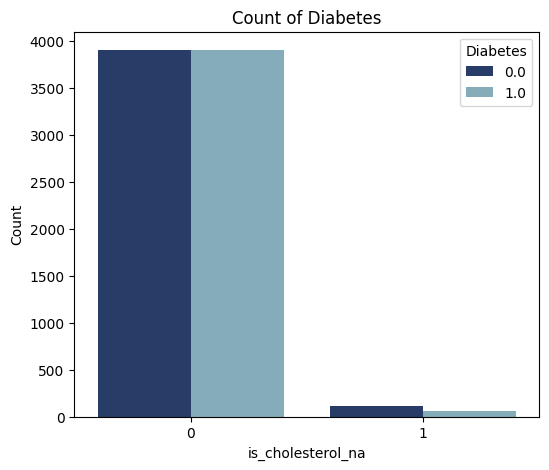

is_cholesterol_na
0    7801
1     172
Name: Diabetes, dtype: int64


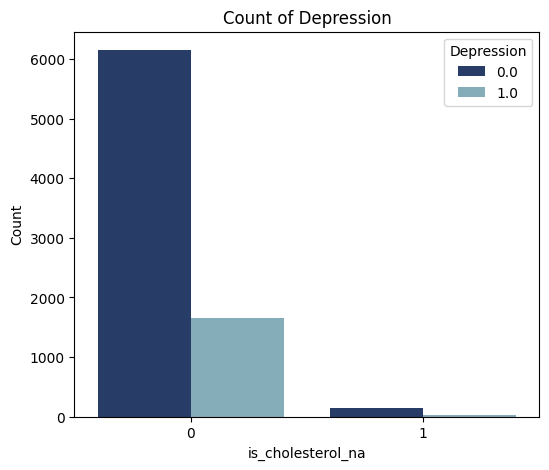

is_cholesterol_na
0    7801
1     172
Name: Depression, dtype: int64


In [9]:
# Checking the type of missing data (MAR, MCAR, or MNAR)

# Calculate descriptive statistics for rows with missing data and rows without missing data
data_no_missing = data.dropna(subset=['Total_Cholesterol'])
summary_no_missing = data_no_missing.describe()

data_missing = data[data['Total_Cholesterol'].isna()]
summary_missing = data_missing.describe()

print("Summary for Rows without Missing Data:")
print(summary_no_missing)

print("Summary for Rows with Missing Data:")
print(summary_missing)


# Investigating the presence of missing values in the Total_Cholesterol column
# Create a binary indicator column 'is_cholesterol_na' to represent missing values in the 'total cholesterol' column
data['is_cholesterol_na'] = data['Total_Cholesterol'].isna().astype(int)


# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_cholesterol_na', hue='Diabetes', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_cholesterol_na')
plt.ylabel('Count')
plt.title('Count of Diabetes')
plt.legend(title='Diabetes')
plt.show()

# Calculate the mean of 'Class/ASD' grouped by 'is_ethnicity_na' and print the result
print(data.groupby('is_cholesterol_na')['Diabetes'].count())

# Remove the 'is_ethnicity_na' column from the DataFrame
data.drop('is_cholesterol_na', axis=1, inplace=True)


# Investigating the presence of missing values in the Total_Cholesterol column
# Create a binary indicator column 'is_cholesterol_na' to represent missing values in the 'total cholesterol' column
data['is_cholesterol_na'] = data['Total_Cholesterol'].isna().astype(int)


# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_cholesterol_na', hue='Depression', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_cholesterol_na')
plt.ylabel('Count')
plt.title('Count of Depression')
plt.legend(title='Depression')
plt.show()

# Calculate the mean of 'Class/ASD' grouped by 'is_ethnicity_na' and print the result
print(data.groupby('is_cholesterol_na')['Depression'].count())

# Remove the 'is_ethnicity_na' column from the DataFrame
data.drop('is_cholesterol_na', axis=1, inplace=True)




---


In this analysis, it seems that there are no differences in descriptive statistics between observations with missing data and observations without missing data in the Total_Cholesterol column, and that the presence/absence of missing values does not influence the output classes. We suspect missing data to be MCAR and can later be imputed by the median values


---



In [10]:
# Checking distribution of Diabetes (outcome) variable
# Compute the count of each class in the 'target' column
counts = data['Diabetes'].value_counts()
print(counts)

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Diabetes"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes'),
    title=dict(
        text='Distribution of Classes in "Diabetes"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()

0.0    4012
1.0    3961
Name: Diabetes, dtype: int64


In [11]:
# Checking distribution of Depression (outcome) variable
# Compute the count of each class in the 'target' column
counts = data['Depression'].value_counts()
print(counts)

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Depression"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Depression'),
    title=dict(
        text='Distribution of Classes in "Depression"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()

0.0    6292
1.0    1681
Name: Depression, dtype: int64


In [14]:
# First, recoding sex to numerical first

# Define mapping from string value to numeric
mapping = {'Female': 0, 'Male': 1}

# Recode Sex column
data['Sex'] = data['Sex'].map(mapping)

In [15]:
# Compute the count of each class in the HTN column
counts = data['HTN'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "HTN"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='HTN'),
    title=dict(
        text='Distribution of Classes in "HTN"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()

# Compute the count of each class in the Sex column
counts = data['Sex'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Sex"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Sex' ),
    title=dict(
        text='Distribution of Classes in "Sex"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()


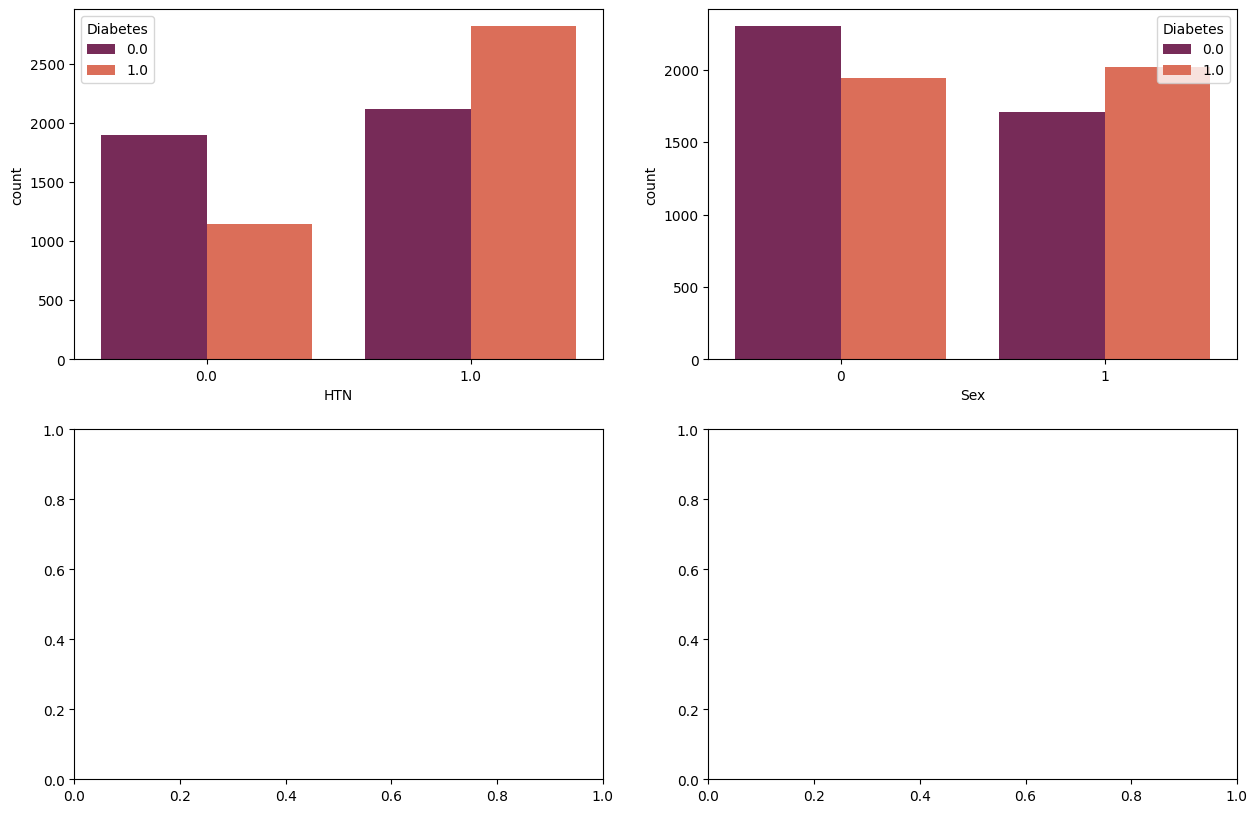

In [16]:
# Checking the difference in the distribution of categorical features across two classes of the outcome

# Initialize a grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

# Loop through each categorical column to plot its distribution
categorical_columns = ['HTN', 'Sex']
for i, column in enumerate(categorical_columns):
    # Determine the subplot's position based on the current index
    x = i // 3
    y = i % 3

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=data, x=column, hue='Diabetes', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

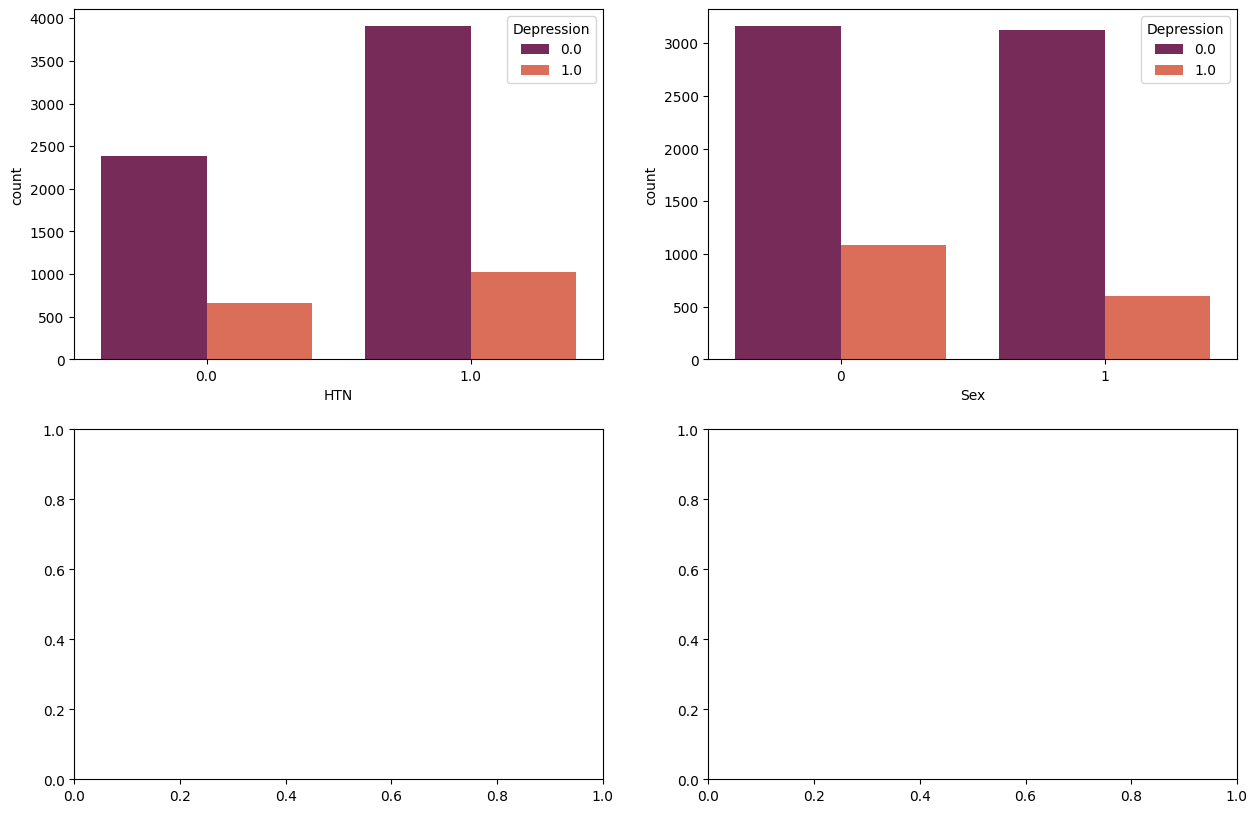

In [17]:
# Checking the difference in the distribution of categorical features across two classes of the outcome

# Initialize a grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

# Loop through each categorical column to plot its distribution
categorical_columns = ['HTN', 'Sex']
for i, column in enumerate(categorical_columns):
    # Determine the subplot's position based on the current index
    x = i // 3
    y = i % 3

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=data, x=column, hue='Depression', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

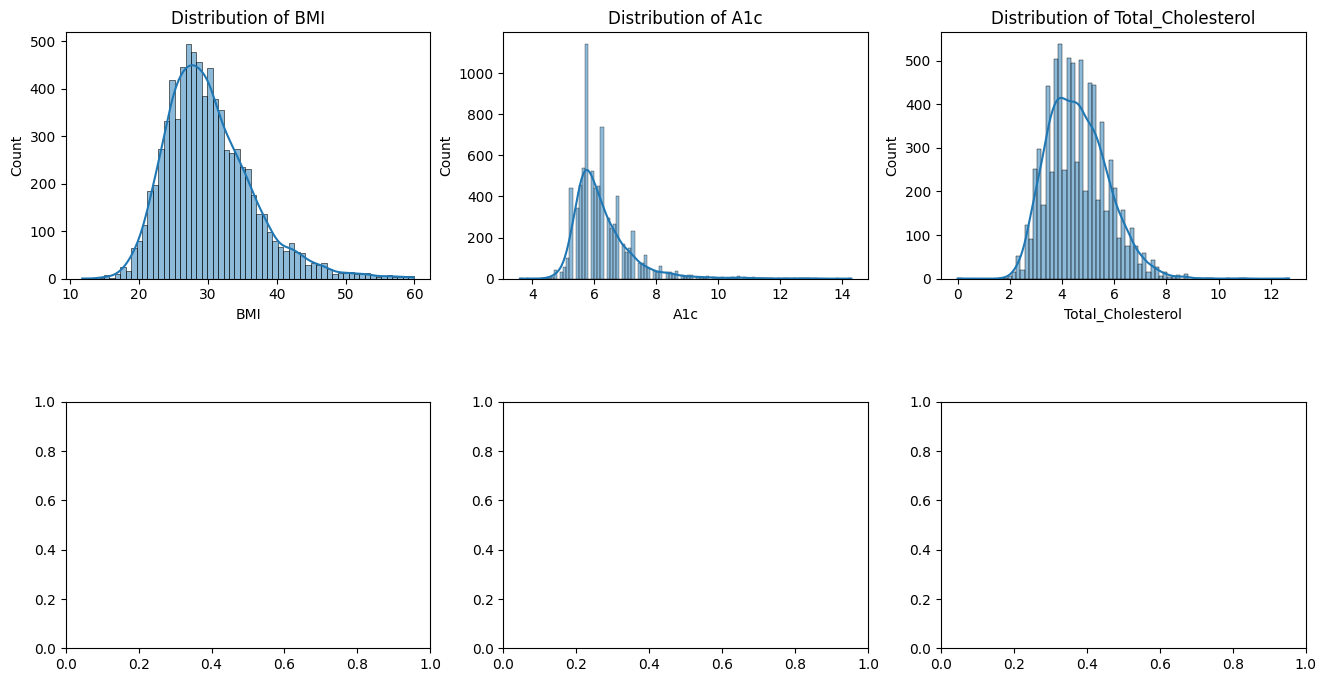

In [18]:
# Creating histograms to visualize continuous variables
continuousVariables = ['BMI', 'A1c', 'Total_Cholesterol']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(continuousVariables):
    sns.histplot(data[continuousVariables[i]], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Distribution of {col}')

plt.show()

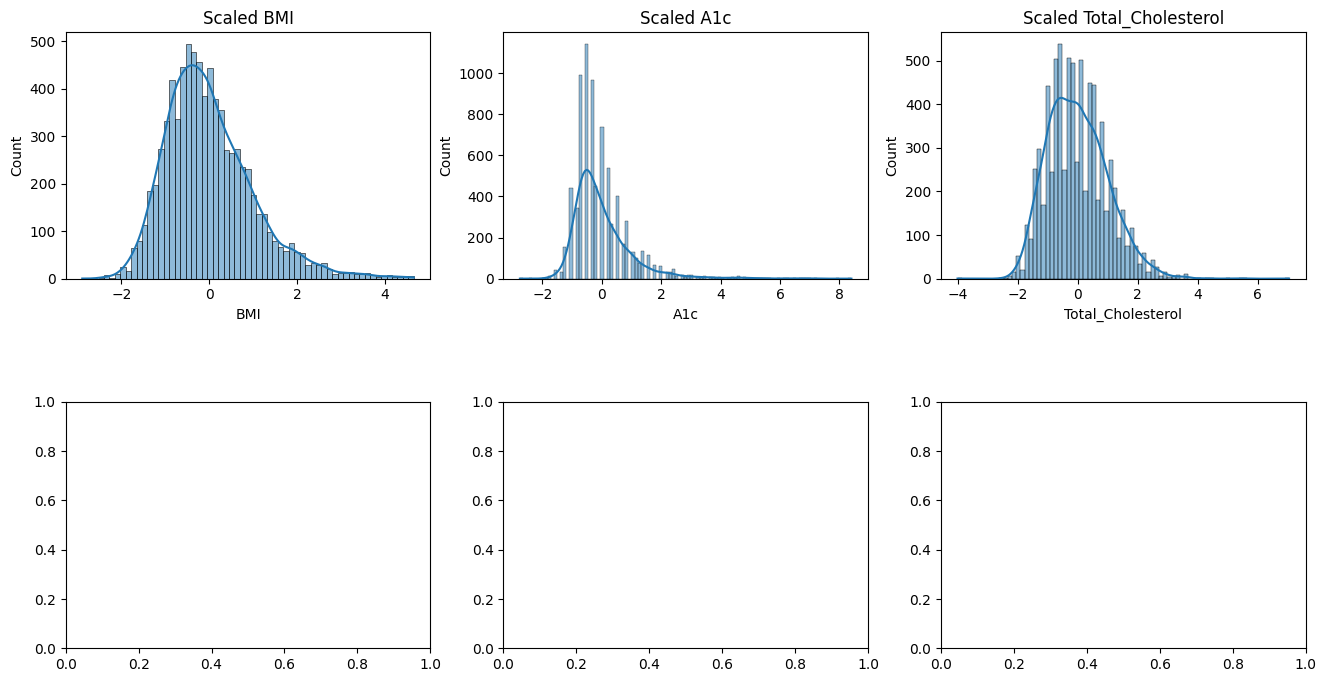

In [19]:
# Looking for Outliers

#Converting BMI from string to float
data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')

scaler = StandardScaler()

# Scale the continuous variables
scaled_variables = scaler.fit_transform(data[continuousVariables])

# Create a DataFrame from the scaled variables using the column names from continuousVariables
scaled_df = pd.DataFrame(scaled_variables, columns=continuousVariables)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Create histograms for scaled continuous variables
for i, col in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[col], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Scaled {col}')

plt.show()

In [20]:
#Defining a Z-score threshold
zscore_threshold = 3

# Iterate through each continuous variable and print potential outliers
for variable_name in continuousVariables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers = data_column[abs(z_scores) > zscore_threshold]
    print(f"Outliers in '{variable_name}':")
    print(outliers)
    print("\n")

Outliers in 'BMI':
3       56.7
40      53.0
46      53.4
213     53.0
514     55.8
        ... 
9004    50.6
9196    50.9
9546    50.2
9803    52.1
9939    49.8
Name: BMI, Length: 99, dtype: float64


Outliers in 'A1c':
4898    10.0
4903    10.6
4917    12.7
4919    11.1
4932    10.6
        ... 
9712    11.2
9797     9.5
9814     9.4
9914    10.1
9980     9.9
Name: A1c, Length: 143, dtype: float64


Outliers in 'Total_Cholesterol':
412      8.8
745     12.7
938      8.8
1262     8.8
1282     8.1
1490     8.8
1743     8.3
1834     8.4
2102     9.5
2287     8.4
2440     8.5
2582     9.8
3084     8.3
3297    11.0
3711     8.7
5075     8.3
5342     9.3
5405     0.0
5838     8.1
5936     8.7
6111     8.5
6336    10.8
6459     8.5
6498     8.5
6523     8.2
6885     8.2
6963     8.8
7640     8.7
7867     8.5
8024     8.1
8051     8.8
8126     9.2
8525     8.1
8694    10.4
9352     8.7
9358     8.4
Name: Total_Cholesterol, dtype: float64




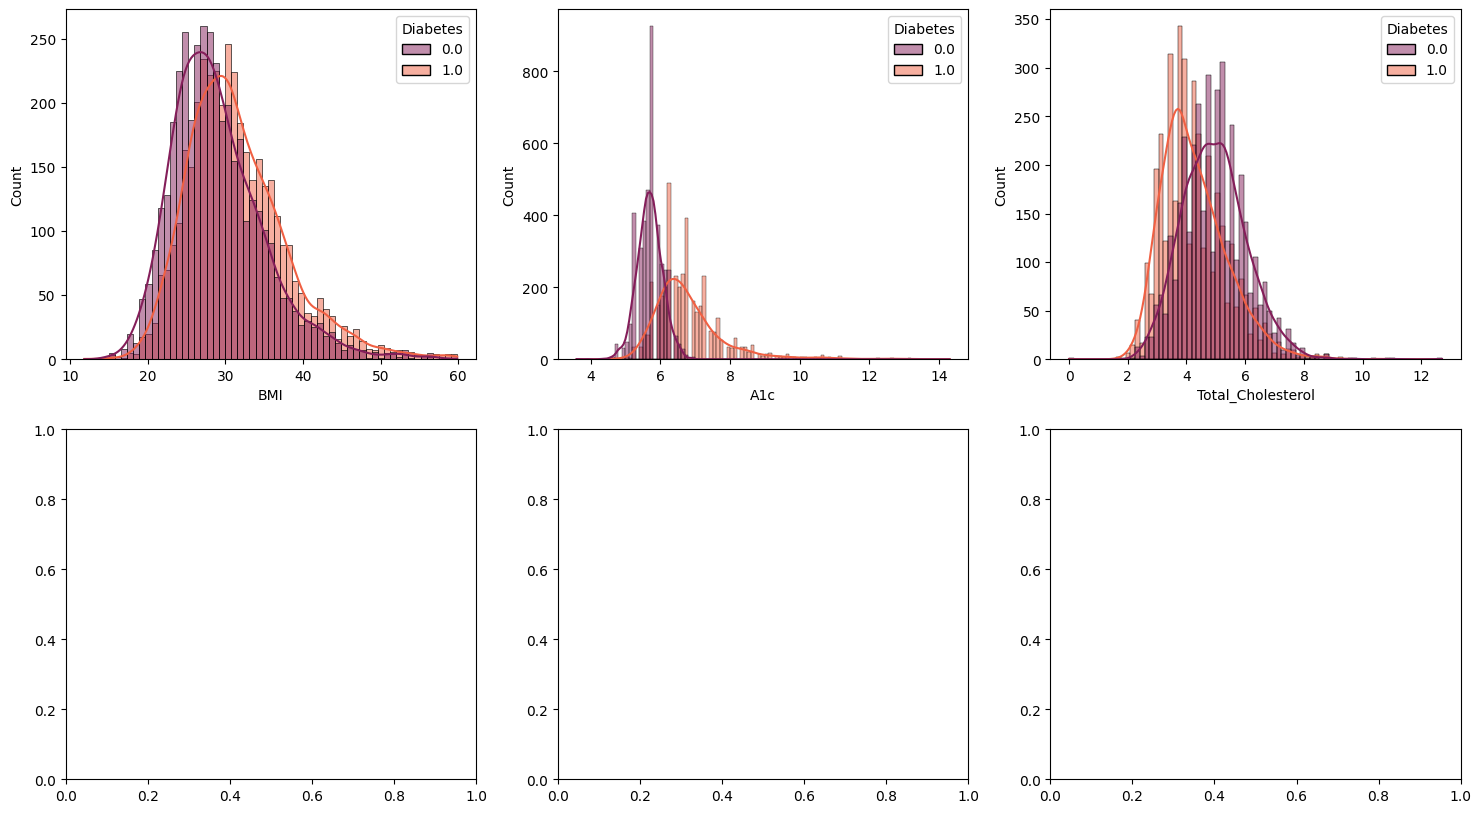

In [21]:
# Checking the difference in the distribution of continuous features across two classes of the outcome

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 10))

# Create list of numerical columns
numerical_columns = ['BMI', 'A1c', 'Total_Cholesterol']

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data, x=column, hue='Diabetes', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

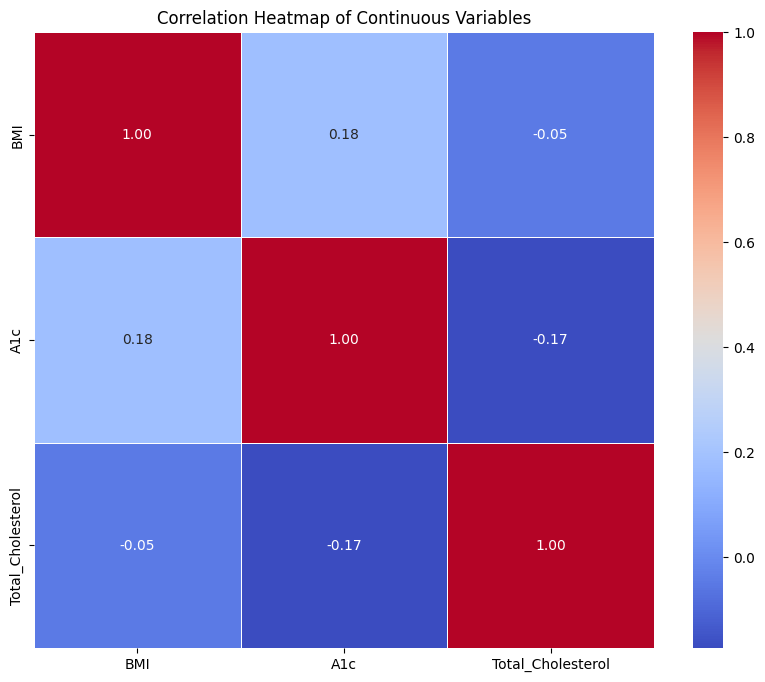

In [22]:
continuousVariables = data[['BMI', 'A1c', 'Total_Cholesterol']]

correlationMatrix = continuousVariables.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [23]:
# For patient characteristics
data.describe()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,Patient_ID
count,7973.000000,7969.000000,7973.000000,7925.000000,7914.000000,7973.000000,7924.000000,7973.000000,7973.000000,7801.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,4161.000000,3959.000000,4165.000000,3959.000000,7.973000e+03
mean,62.726828,130.295520,30.222576,2.575394,1.332259,6.244688,1.558051,6.276709,0.919980,4.599449,0.496802,0.210837,0.618713,0.305155,0.096576,0.467453,41221.528238,40083.647386,41131.921248,40012.392271,3.921618e+15
std,13.295821,16.984442,6.377751,0.958490,0.409275,0.958831,1.041705,1.744246,0.271341,1.149711,0.500021,0.407928,0.485733,0.460502,0.295398,0.498971,717.364786,1026.296522,760.404352,978.718927,2.436494e+15
min,18.000000,60.000000,11.800000,0.100000,0.200000,3.600000,0.200000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37966.000000,32509.000000,38023.000000,32509.000000,1.001000e+15
25%,54.000000,120.000000,25.800000,1.900000,1.000000,5.600000,1.000000,5.200000,1.000000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40799.000000,39366.000000,40660.000000,39343.000000,2.001000e+15
50%,63.000000,130.000000,29.300000,2.500000,1.300000,6.000000,1.300000,5.800000,1.000000,4.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,41411.000000,40038.000000,41313.000000,39979.000000,4.001000e+15
75%,73.000000,140.000000,33.700000,3.200000,1.600000,6.600000,1.900000,6.900000,1.000000,5.300000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,41774.000000,40828.000000,41744.000000,40743.000000,4.001000e+15
max,90.000000,229.000000,59.900000,8.600000,4.000000,14.300000,22.600000,23.500000,1.000000,12.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42184.000000,42185.000000,42184.000000,42157.000000,1.000100e+16


In [ ]:
# Impute Total_Cholesterol with median
median_value = data['Total_Cholesterol'].median()
data['Total_Cholesterol'].fillna(median_value, inplace=True)

In [ ]:
# Drop other variables that are not part of a-priori conceptual model, for diabetes and depression models
data_diabetes = data.drop(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'DM_OnsetDate',	'Depression',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior', 'DIABETES'], axis=1)
data_depression = data.drop(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'DM_OnsetDate',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES', 'Diabetes'], axis = 1)

# **NN MODEL - DIABETES**

Data preparation

In [ ]:
# Load libraries
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
import torch.nn as nn
import matplotlib.pyplot as pl
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import BCELoss

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
data_diabetes.dtypes

BMI                  float64
A1c                  float64
Total_Cholesterol    float64
Diabetes             float64
HTN                  float64
Sex                    int64
dtype: object

In [ ]:
data_diabetes.head()

,BMI,A1c,Total_Cholesterol,Diabetes,HTN,Sex
0,31.0,5.4,3.8,0.0,0.0,0
1,25.8,5.8,4.5,0.0,1.0,0
2,30.9,6.1,4.5,0.0,1.0,1
3,56.7,6.0,5.2,0.0,0.0,0
4,33.1,5.8,4.1,0.0,0.0,0


In [ ]:
# Splitting the data into 70% training and 30% testing
train = data_diabetes.sample(frac=0.7, random_state=42)
test = data_diabetes.drop(train.index)

# Extract the 'Diabetes' column as the target variable for training and testing
Y_train = train['Diabetes'].to_numpy()
Y_test = test['Diabetes'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train.drop('Diabetes', axis=1).to_numpy()
X_test = test.drop('Diabetes', axis=1).to_numpy()

# Standardize features to have 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



Initialize NN parameters in PyTorch

In [ ]:

# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((5, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)


In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with ReLU activation
    out = relu(input @ W1 + B1)

    # Second hidden layer with ReLU activation
    out = relu(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 50

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())
        print(f'Batch {batch_idx} of {len(train_data_loader)} complete')

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))


Streaming output truncated to the last 5000 lines.
Batch 40 of 112 complete
Batch 41 of 112 complete
Batch 42 of 112 complete
Batch 43 of 112 complete
Batch 44 of 112 complete
Batch 45 of 112 complete
Batch 46 of 112 complete
Batch 47 of 112 complete
Batch 48 of 112 complete
Batch 49 of 112 complete
Batch 50 of 112 complete
Batch 51 of 112 complete
Batch 52 of 112 complete
Batch 53 of 112 complete
Batch 54 of 112 complete
Batch 55 of 112 complete
Batch 56 of 112 complete
Batch 57 of 112 complete
Batch 58 of 112 complete
Batch 59 of 112 complete
Batch 60 of 112 complete
Batch 61 of 112 complete
Batch 62 of 112 complete
Batch 63 of 112 complete
Batch 64 of 112 complete
Batch 65 of 112 complete
Batch 66 of 112 complete
Batch 67 of 112 complete
Batch 68 of 112 complete
Batch 69 of 112 complete
Batch 70 of 112 complete
Batch 71 of 112 complete
Batch 72 of 112 complete
Batch 73 of 112 complete
Batch 74 of 112 complete
Batch 75 of 112 complete
Batch 76 of 112 complete
Batch 77 of 112 complete

Text(0, 0.5, 'loss')

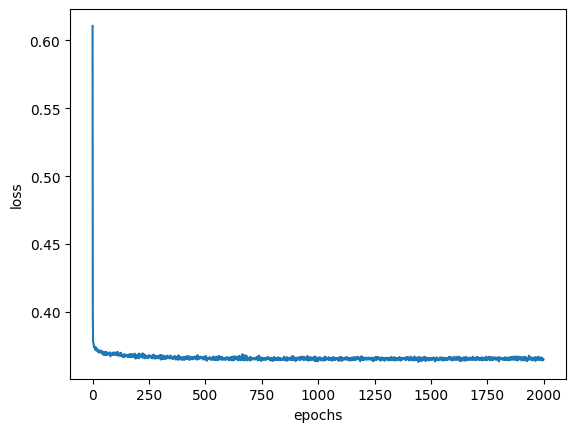

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.35344311594963074
0.3627046048641205


Testing model has similar loss function compared to training, albeit a little larger. However, we will still run regularization to reduce overfitting



---
Regularized training of neural network in PyTorch


---




In [ ]:
# Define hyperparameters
number_of_input_features = 5
number_of_hidden_units = 3 #Reduced number of hidden units to reduce overfitting
epochs = 250
learning_rate = 0.001 #Reduced to avoid overfitting
batch_size = 32 #Reduced to prevent overfitting
landa = 0.1  # Regularization term (lambda), increased to penalize large weights more heavily
dropout_probability = 0.5  # Probability of dropping out a neuron in dropout layer

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.ReLU(),  # ReLU activation function
    Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/250 ---> Train Accuracy: 0.5049274563789368, Validation Accuracy: 0.5158863067626953
Epoch 1/250 ---> Train Accuracy: 0.537179708480835, Validation Accuracy: 0.542224109172821
Epoch 2/250 ---> Train Accuracy: 0.6228274703025818, Validation Accuracy: 0.6270902752876282
Epoch 3/250 ---> Train Accuracy: 0.7366063594818115, Validation Accuracy: 0.7537625432014465
Epoch 4/250 ---> Train Accuracy: 0.7849847674369812, Validation Accuracy: 0.8127090334892273
Epoch 5/250 ---> Train Accuracy: 0.8023651838302612, Validation Accuracy: 0.8239966630935669
Epoch 6/250 ---> Train Accuracy: 0.8073821663856506, Validation Accuracy: 0.8244147300720215
Epoch 7/250 ---> Train Accuracy: 0.8077405691146851, Validation Accuracy: 0.8285953402519226
Epoch 8/250 ---> Train Accuracy: 0.8159828186035156, Validation Accuracy: 0.8244147300720215
Epoch 9/250 ---> Train Accuracy: 0.8166995048522949, Validation Accuracy: 0.8193979859352112
Epoch 10/250 ---> Train Accuracy: 0.8147285580635071, Validation Accurac

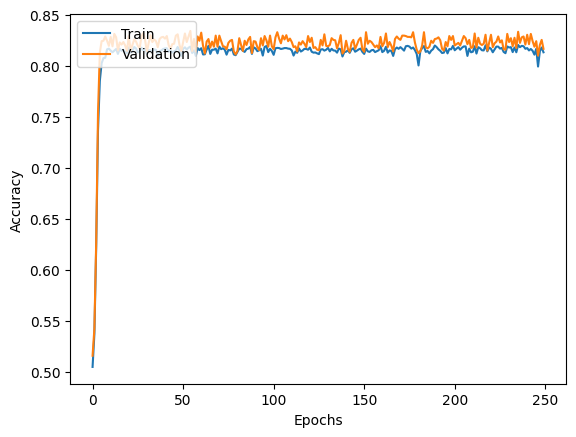

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Calculate average accuracy
import statistics

print("train accuracy", statistics.mean(train_accuracy_list))
print("validation accuracy", statistics.mean(validation_accuracy_list))



train accuracy 0.8115233821868897
validation accuracy 0.8192692306041718


# **NN MODEL - DEPRESSION**

In [ ]:
data_depression.dtypes

BMI                  float64
A1c                  float64
Total_Cholesterol    float64
Depression           float64
HTN                  float64
Sex                    int64
dtype: object

Data preparation

In [ ]:
import numpy as np

# Splitting the data into 70% training and 30% testing
train = data_depression.sample(frac=0.7, random_state=42)
test = data_depression.drop(train.index)

# Extract the 'Depression' column as the target variable for training and testing
Y_train = train['Depression'].to_numpy()
Y_test = test['Depression'].to_numpy()

# Extract the features (excluding 'Depression') for training and testing
X_train = train.drop('Depression', axis=1).to_numpy()
X_test = test.drop('Depression', axis=1).to_numpy()

# Standardize features to have 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling using SMOTE-NC because our outcome is imbalanced, with some categorical features
from imblearn.over_sampling import SMOTENC

# Oversampling using SMOTE-NC with only the specified categorical features
smote_nc = SMOTENC(categorical_features=[3,4], random_state=42)
X_train_resampled, Y_train_resampled = smote_nc.fit_resample(X_train, Y_train)

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_resampled == 0)))

After OverSampling, counts of label '1': 4395
After OverSampling, counts of label '0': 4395


Initialize NN parameters in pytorch

In [ ]:

# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 3
hidden_units_layer_2 = 3

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((5, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)


In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with ReLU activation
    out = relu(input @ W1 + B1)

    # Second hidden layer with ReLU activation
    out = relu(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_resampled).type(t.float32)
Y = t.Tensor(Y_train_resampled).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 500
learning_rate = 0.001
batch_size = 20

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

Text(0, 0.5, 'loss')

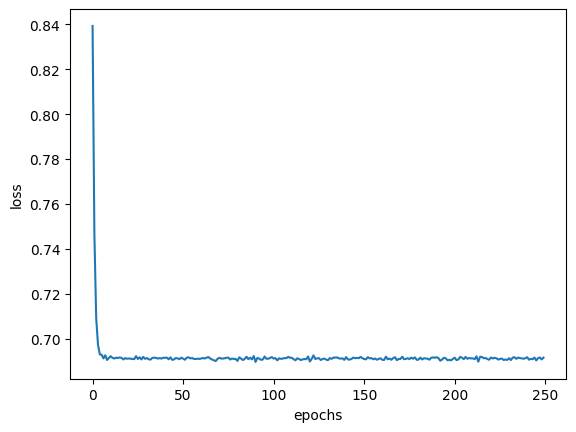

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

2.3676981925964355
2.3811535835266113


In [ ]:
# Define hyperparameters
number_of_input_features = 5
number_of_hidden_units = 3
epochs = 100
learning_rate = 0.01
batch_size = 50
landa = 0.01  # Regularization term (lambda)
dropout_probability = 0.6 # Probability of dropping out a neuron in dropout layer

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.ReLU(),  # ReLU activation function
    Dropout(dropout_probability),
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 50 == 0:
        learning_rate *= 0.09  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 1/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 2/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 3/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 4/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 5/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 6/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 7/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 8/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 9/100 ---> Train Accuracy: 0.7874932885169983, Validation Accuracy: 0.7930601835250854
Epoch 10/100 ---> Train Accuracy: 0.7874932885169983, Validation Accur

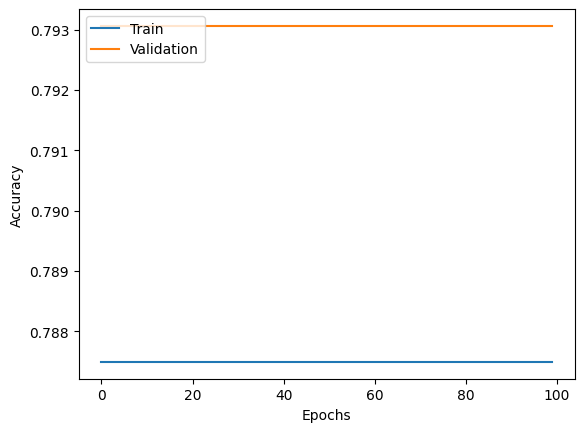

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Calculate average accuracy
import statistics

print("train accuracy", statistics.mean(train_accuracy_list))
print("validation accuracy", statistics.mean(validation_accuracy_list))



train accuracy 0.7874932885169983
validation accuracy 0.7930601835250854


# **PART 2: NATURAL LANGUAGE PROCESSING**

Data Exploration - taken from tutorial

In [ ]:
# Install UMAP, a library for dimensionality reduction
!pip install umap

# Install datasets, which provides access to various NLP datasets
!pip install datasets

# Install transformers, a library for working with pre-trained Transformer models
!pip install transformers

# Upgrade the accelerate library to the latest version
!pip install accelerate -U

# Import necessary libraries
import warnings
import torch
import pandas as pd
import umap as UMAP  # Import UMAP for dimensionality reduction
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score

# Import AutoModelForSequenceClassification for sequence classification tasks
from transformers import AutoModelForSequenceClassification

# Import AutoTokenizer and AutoModel for handling pre-trained models
from transformers import AutoTokenizer, AutoModel

# Import Dataset and DatasetDict for working with datasets
from datasets import Dataset, DatasetDict

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

# Check if a GPU (cuda) is available, if not, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=adf4ddf31219dfc3c53fd3a0d642f0bf883d24f0e6b91c6c72c8a892efe80093
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Print the device type
device

device(type='cpu')

In [ ]:
# Import file
from google.colab import files
uploaded = files.upload()

Saving nlp - nlp.csv to nlp - nlp.csv


In [ ]:
# Read the data from a CSV file into a DataFrame - whenever the file is created
df = pd.read_csv("nlp - nlp.csv", encoding='ISO-8859-1')

In [ ]:
# Print the column names
print(df.columns)

Index(['Title', 'Authors', 'Discussion', 'Abstract', 'Published Year',
       'Published Month', 'Journal', 'Volume', 'Issue', 'Pages',
       'Accession Number', 'DOI', 'Ref', 'Covidence #', 'Study', 'Notes',
       'Tags'],
      dtype='object')


In [ ]:
# Combine 'Title' and 'Abstract'
df['combined_text'] = df['Title'] + ' ' + df['Abstract'] + df['Discussion']

# Display the first few rows of the DataFrame to inspect the selected columns
df.head()

,Title,Authors,Discussion,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,combined_text
0,Predicting complications of diabetes mellitus ...,Ljubic B; Hai AA; Stanojevic M; Diaz W; Polima...,In conducted experiments both deep learning al...,OBJECTIVE: We sought to predict if patients wi...,2020,Jul,J Am Med Inform Assoc,27,9,1343-1351,NaN,10.1093/jamia/ocaa120,32869093,#1,Ljubic 2020,NaN,NaN,Predicting complications of diabetes mellitus ...
1,Machine learning as new promising technique fo...,Lotfi H; Pirmoradi S; Mahmoudi R; Teshnehlab M...,Affecting a large number of the global populat...,Background The global trend of obesity and dia...,2020,Jan,Horm Mol Biol Clin Investig,41,1,NaN,NaN,10.1515/hmbci-2019-0019,31926078,#2,Lotfi 2020,NaN,NaN,Machine learning as new promising technique fo...
2,Roles of Anxiety and Depression in Predicting ...,Chu H; Chen L; Yang X; Qiu X; Qiao Z; Song X; ...,The estimation of cardiovascular complications...,Cardiovascular disease (CVD) is a major compli...,2021,NaN,Front Psychol,12,NaN,645418,NaN,10.3389/fpsyg.2021.645418,33995200,#3,Chu 2021,NaN,NaN,Roles of Anxiety and Depression in Predicting ...
3,Nailfold capillaroscopy and deep learning in d...,Shah R; Petch J; Nelson W; Roth K; Noseworthy ...,The relationship between capillary disease and...,OBJECTIVE: To determine whether nailfold capil...,2023,Feb,J Diabetes,15,2,145-151,NaN,10.1111/1753-0407.13354,36641812,#5,Shah 2023,NaN,NaN,Nailfold capillaroscopy and deep learning in d...
4,Opportunistic detection of type 2 diabetes usi...,Pyrros A; Borstelmann SM; Mantravadi R; Zaiman...,"In this study, we developed a DL model that ca...",Deep learning (DL) models can harness electron...,2023,Jul,Nat Commun,14,1,4039,NaN,10.1038/s41467-023-39631-x,37419921,#6,Pyrros 2023,NaN,NaN,Opportunistic detection of type 2 diabetes usi...


In [ ]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to the 'tweet' column of the DataFrame.
df['combined_text'] = df['combined_text'].apply(clean_encoding)
df.head()

,Title,Authors,Discussion,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,combined_text
0,Predicting complications of diabetes mellitus ...,Ljubic B; Hai AA; Stanojevic M; Diaz W; Polima...,In conducted experiments both deep learning al...,OBJECTIVE: We sought to predict if patients wi...,2020,Jul,J Am Med Inform Assoc,27,9,1343-1351,NaN,10.1093/jamia/ocaa120,32869093,#1,Ljubic 2020,NaN,NaN,Predicting complications of diabetes mellitus ...
1,Machine learning as new promising technique fo...,Lotfi H; Pirmoradi S; Mahmoudi R; Teshnehlab M...,Affecting a large number of the global populat...,Background The global trend of obesity and dia...,2020,Jan,Horm Mol Biol Clin Investig,41,1,NaN,NaN,10.1515/hmbci-2019-0019,31926078,#2,Lotfi 2020,NaN,NaN,Machine learning as new promising technique fo...
2,Roles of Anxiety and Depression in Predicting ...,Chu H; Chen L; Yang X; Qiu X; Qiao Z; Song X; ...,The estimation of cardiovascular complications...,Cardiovascular disease (CVD) is a major compli...,2021,NaN,Front Psychol,12,NaN,645418,NaN,10.3389/fpsyg.2021.645418,33995200,#3,Chu 2021,NaN,NaN,Roles of Anxiety and Depression in Predicting ...
3,Nailfold capillaroscopy and deep learning in d...,Shah R; Petch J; Nelson W; Roth K; Noseworthy ...,The relationship between capillary disease and...,OBJECTIVE: To determine whether nailfold capil...,2023,Feb,J Diabetes,15,2,145-151,NaN,10.1111/1753-0407.13354,36641812,#5,Shah 2023,NaN,NaN,Nailfold capillaroscopy and deep learning in d...
4,Opportunistic detection of type 2 diabetes usi...,Pyrros A; Borstelmann SM; Mantravadi R; Zaiman...,"In this study, we developed a DL model that ca...",Deep learning (DL) models can harness electron...,2023,Jul,Nat Commun,14,1,4039,NaN,10.1038/s41467-023-39631-x,37419921,#6,Pyrros 2023,NaN,NaN,Opportunistic detection of type 2 diabetes usi...


In [ ]:
# Import the Plotly Express library for creating visualizations
import plotly.express as px

# Define custom colors for the pie chart pieces
custom_colors = ['#6b034c', '#66b3b0']

# might need to preprocess this column to count individual keywords

# Counting keywords
from collections import Counter
counts = df['Published Year'].value_counts()

# Create a pie chart using Plotly Express with custom colors
fig = px.pie(
    names=counts.index,  # Class labels as names
    values=counts.values,  # Class counts as values
    hole=0.5,  # Size of the hole in the center of the pie chart (50%)
    title='Distribution of Years in article"',  # Title of the pie chart
    color_discrete_sequence=custom_colors  # Specify custom colors
)

# Update the layout of the pie chart for better appearance and readability

# Set margins and legend position
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Class'
    ),
    # Set title position, font size, and chart dimensions
    title=dict(
        text='Distribution of Classes in "Class"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Show the pie chart
fig.show()

This tells us the articles we extracted are quite recent - the legend is showing the order of the years with most published articles (based on what we extracted). It is important to note the published years because this shows us if the articles we extracted may be potentially too outdated and further investigate.

In [ ]:
!pip install contractions
import contractions

# Expand contractions in the 'combined_text' column
df['combined_text_expanded'] = df['combined_text'].apply(lambda x: contractions.fix(x))
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.0 MB/s eta 0:00:00


,Title,Authors,Discussion,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,combined_text,combined_text_expanded
0,Predicting complications of diabetes mellitus ...,Ljubic B; Hai AA; Stanojevic M; Diaz W; Polima...,In conducted experiments both deep learning al...,OBJECTIVE: We sought to predict if patients wi...,2020,Jul,J Am Med Inform Assoc,27,9,1343-1351,NaN,10.1093/jamia/ocaa120,32869093,#1,Ljubic 2020,NaN,NaN,Predicting complications of diabetes mellitus ...,Predicting complications of diabetes mellitus ...
1,Machine learning as new promising technique fo...,Lotfi H; Pirmoradi S; Mahmoudi R; Teshnehlab M...,Affecting a large number of the global populat...,Background The global trend of obesity and dia...,2020,Jan,Horm Mol Biol Clin Investig,41,1,NaN,NaN,10.1515/hmbci-2019-0019,31926078,#2,Lotfi 2020,NaN,NaN,Machine learning as new promising technique fo...,Machine learning as new promising technique fo...
2,Roles of Anxiety and Depression in Predicting ...,Chu H; Chen L; Yang X; Qiu X; Qiao Z; Song X; ...,The estimation of cardiovascular complications...,Cardiovascular disease (CVD) is a major compli...,2021,NaN,Front Psychol,12,NaN,645418,NaN,10.3389/fpsyg.2021.645418,33995200,#3,Chu 2021,NaN,NaN,Roles of Anxiety and Depression in Predicting ...,Roles of Anxiety and Depression in Predicting ...
3,Nailfold capillaroscopy and deep learning in d...,Shah R; Petch J; Nelson W; Roth K; Noseworthy ...,The relationship between capillary disease and...,OBJECTIVE: To determine whether nailfold capil...,2023,Feb,J Diabetes,15,2,145-151,NaN,10.1111/1753-0407.13354,36641812,#5,Shah 2023,NaN,NaN,Nailfold capillaroscopy and deep learning in d...,Nailfold capillaroscopy and deep learning in d...
4,Opportunistic detection of type 2 diabetes usi...,Pyrros A; Borstelmann SM; Mantravadi R; Zaiman...,"In this study, we developed a DL model that ca...",Deep learning (DL) models can harness electron...,2023,Jul,Nat Commun,14,1,4039,NaN,10.1038/s41467-023-39631-x,37419921,#6,Pyrros 2023,NaN,NaN,Opportunistic detection of type 2 diabetes usi...,Opportunistic detection of type 2 diabetes usi...


In [ ]:
# Let's perform some basic data cleaning tasks such as:
# - Converting the date column to datetime
# - Lowercasing the combined text
# - Removing special characters and numbers

import re

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['Published Year'] = pd.to_datetime(df['Published Year'])
df['combined_text'] = df['combined_text_expanded'].str.lower()
df['combined_text'] = df['combined_text'].apply(remove_special_characters)

df.head()

,Title,Authors,Discussion,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,combined_text,combined_text_expanded
0,Predicting complications of diabetes mellitus ...,Ljubic B; Hai AA; Stanojevic M; Diaz W; Polima...,In conducted experiments both deep learning al...,OBJECTIVE: We sought to predict if patients wi...,1970-01-01 00:00:00.000002020,Jul,J Am Med Inform Assoc,27,9,1343-1351,NaN,10.1093/jamia/ocaa120,32869093,#1,Ljubic 2020,NaN,NaN,predicting complications of diabetes mellitus ...,Predicting complications of diabetes mellitus ...
1,Machine learning as new promising technique fo...,Lotfi H; Pirmoradi S; Mahmoudi R; Teshnehlab M...,Affecting a large number of the global populat...,Background The global trend of obesity and dia...,1970-01-01 00:00:00.000002020,Jan,Horm Mol Biol Clin Investig,41,1,NaN,NaN,10.1515/hmbci-2019-0019,31926078,#2,Lotfi 2020,NaN,NaN,machine learning as new promising technique fo...,Machine learning as new promising technique fo...
2,Roles of Anxiety and Depression in Predicting ...,Chu H; Chen L; Yang X; Qiu X; Qiao Z; Song X; ...,The estimation of cardiovascular complications...,Cardiovascular disease (CVD) is a major compli...,1970-01-01 00:00:00.000002021,NaN,Front Psychol,12,NaN,645418,NaN,10.3389/fpsyg.2021.645418,33995200,#3,Chu 2021,NaN,NaN,roles of anxiety and depression in predicting ...,Roles of Anxiety and Depression in Predicting ...
3,Nailfold capillaroscopy and deep learning in d...,Shah R; Petch J; Nelson W; Roth K; Noseworthy ...,The relationship between capillary disease and...,OBJECTIVE: To determine whether nailfold capil...,1970-01-01 00:00:00.000002023,Feb,J Diabetes,15,2,145-151,NaN,10.1111/1753-0407.13354,36641812,#5,Shah 2023,NaN,NaN,nailfold capillaroscopy and deep learning in d...,Nailfold capillaroscopy and deep learning in d...
4,Opportunistic detection of type 2 diabetes usi...,Pyrros A; Borstelmann SM; Mantravadi R; Zaiman...,"In this study, we developed a DL model that ca...",Deep learning (DL) models can harness electron...,1970-01-01 00:00:00.000002023,Jul,Nat Commun,14,1,4039,NaN,10.1038/s41467-023-39631-x,37419921,#6,Pyrros 2023,NaN,NaN,opportunistic detection of type diabetes usin...,Opportunistic detection of type 2 diabetes usi...


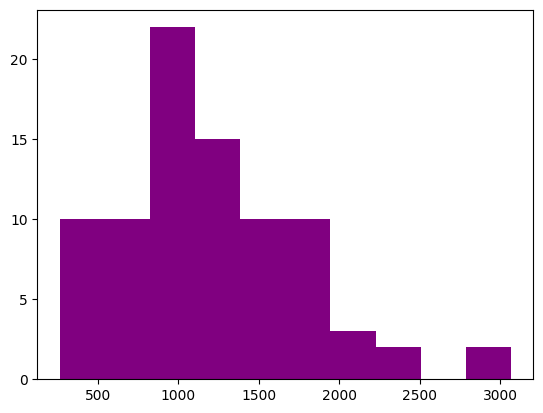

In [ ]:
import matplotlib.pyplot as plt

# Calculate word counts and create a histogram
word_counts = df['combined_text'].apply(lambda x: len(x.split(' ')))
plt.hist(word_counts, color='purple')  # Set the color to purple

# Customize the plot by removing gridlines
plt.grid(False)  # Remove gridlines

# Display the histogram
plt.show()

In [ ]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

df['tokens'] = df['combined_text'].apply(tokenize_text)
df.head()

,Title,Authors,Discussion,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,combined_text,combined_text_expanded,tokens
0,Predicting complications of diabetes mellitus ...,Ljubic B; Hai AA; Stanojevic M; Diaz W; Polima...,In conducted experiments both deep learning al...,OBJECTIVE: We sought to predict if patients wi...,1970-01-01 00:00:00.000002020,Jul,J Am Med Inform Assoc,27,9,1343-1351,NaN,10.1093/jamia/ocaa120,32869093,#1,Ljubic 2020,NaN,NaN,predicting complications of diabetes mellitus ...,Predicting complications of diabetes mellitus ...,"[predicting, complications, of, diabetes, mell..."
1,Machine learning as new promising technique fo...,Lotfi H; Pirmoradi S; Mahmoudi R; Teshnehlab M...,Affecting a large number of the global populat...,Background The global trend of obesity and dia...,1970-01-01 00:00:00.000002020,Jan,Horm Mol Biol Clin Investig,41,1,NaN,NaN,10.1515/hmbci-2019-0019,31926078,#2,Lotfi 2020,NaN,NaN,machine learning as new promising technique fo...,Machine learning as new promising technique fo...,"[machine, learning, as, new, promising, techni..."
2,Roles of Anxiety and Depression in Predicting ...,Chu H; Chen L; Yang X; Qiu X; Qiao Z; Song X; ...,The estimation of cardiovascular complications...,Cardiovascular disease (CVD) is a major compli...,1970-01-01 00:00:00.000002021,NaN,Front Psychol,12,NaN,645418,NaN,10.3389/fpsyg.2021.645418,33995200,#3,Chu 2021,NaN,NaN,roles of anxiety and depression in predicting ...,Roles of Anxiety and Depression in Predicting ...,"[roles, of, anxiety, and, depression, in, pred..."
3,Nailfold capillaroscopy and deep learning in d...,Shah R; Petch J; Nelson W; Roth K; Noseworthy ...,The relationship between capillary disease and...,OBJECTIVE: To determine whether nailfold capil...,1970-01-01 00:00:00.000002023,Feb,J Diabetes,15,2,145-151,NaN,10.1111/1753-0407.13354,36641812,#5,Shah 2023,NaN,NaN,nailfold capillaroscopy and deep learning in d...,Nailfold capillaroscopy and deep learning in d...,"[nailfold, capillaroscopy, and, deep, learning..."
4,Opportunistic detection of type 2 diabetes usi...,Pyrros A; Borstelmann SM; Mantravadi R; Zaiman...,"In this study, we developed a DL model that ca...",Deep learning (DL) models can harness electron...,1970-01-01 00:00:00.000002023,Jul,Nat Commun,14,1,4039,NaN,10.1038/s41467-023-39631-x,37419921,#6,Pyrros 2023,NaN,NaN,opportunistic detection of type diabetes usin...,Opportunistic detection of type 2 diabetes usi...,"[opportunistic, detection, of, type, diabetes,..."


In [ ]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['combined_text', 'tokens', 'tokens_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,combined_text,tokens,tokens_no_stop
0,predicting complications of diabetes mellitus ...,"[predicting, complications, of, diabetes, mell...","[predicting, complications, diabetes, mellitus..."
1,machine learning as new promising technique fo...,"[machine, learning, as, new, promising, techni...","[machine, learning, new, promising, technique,..."
2,roles of anxiety and depression in predicting ...,"[roles, of, anxiety, and, depression, in, pred...","[roles, anxiety, depression, predicting, cardi..."
3,nailfold capillaroscopy and deep learning in d...,"[nailfold, capillaroscopy, and, deep, learning...","[nailfold, capillaroscopy, deep, learning, dia..."
4,opportunistic detection of type diabetes usin...,"[opportunistic, detection, of, type, diabetes,...","[opportunistic, detection, type, diabetes, usi..."


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase, remove punctuation, tokenize, remove stopwords, and stem
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing
df['processed_text'] = df['combined_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['aim', 'objective', 'method', 'conclusion', 'depression', 'diabetes', 'neural networks', 'model', 'machine learning', 'background', 'results', 'used','using', 't2dm', 'machine', 'learning', 'models', 'methods', 'et', 'al', 'tdm', 'study', 'data', 'feature', 'neural network', 'show', 'base', 'based', 'may', 'disease', 'predict', 'study', 'network', 'neural', 'features', 'studies', 'showed'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['combined_text', 'tokens', 'tokens_no_stop_context']].head()

,combined_text,tokens,tokens_no_stop_context
0,predicting complications of diabetes mellitus ...,"[predicting, complications, of, diabetes, mell...","[predicting, complications, mellitus, advanced..."
1,machine learning as new promising technique fo...,"[machine, learning, as, new, promising, techni...","[new, promising, technique, selection, signifi..."
2,roles of anxiety and depression in predicting ...,"[roles, of, anxiety, and, depression, in, pred...","[roles, anxiety, predicting, cardiovascular, a..."
3,nailfold capillaroscopy and deep learning in d...,"[nailfold, capillaroscopy, and, deep, learning...","[nailfold, capillaroscopy, deep, determine, wh..."
4,opportunistic detection of type diabetes usin...,"[opportunistic, detection, of, type, diabetes,...","[opportunistic, detection, type, deep, frontal..."


In [ ]:
from collections import Counter

# Create a list of all words and count frequencies
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)

# Identify the most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('model', 1200), ('use', 893), ('studi', 859), ('predict', 853), ('data', 697), ('learn', 549), ('diabet', 548), ('depress', 510), ('perform', 442), ('patient', 437), ('featur', 397), ('result', 396), ('accuraci', 375), ('method', 374), ('risk', 335), ('diseas', 311), ('et', 301), ('al', 301), ('deep', 297), ('machin', 289)]


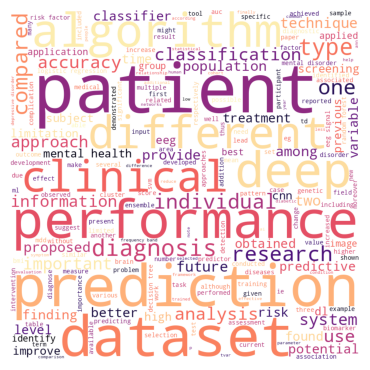

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Display the DataFrame
df[['Published Year', 'combined_text', 'tokens_no_stop_context', 'lemmatized']].head()

,Published Year,combined_text,tokens_no_stop_context,lemmatized
0,1970-01-01 00:00:00.000002020,predicting complications of diabetes mellitus ...,"[predicting, complications, mellitus, advanced...","[predict, complication, mellitus, advance, alg..."
1,1970-01-01 00:00:00.000002020,machine learning as new promising technique fo...,"[new, promising, technique, selection, signifi...","[new, promising, technique, selection, signifi..."
2,1970-01-01 00:00:00.000002021,roles of anxiety and depression in predicting ...,"[roles, anxiety, predicting, cardiovascular, a...","[role, anxiety, predict, cardiovascular, among..."
3,1970-01-01 00:00:00.000002023,nailfold capillaroscopy and deep learning in d...,"[nailfold, capillaroscopy, deep, determine, wh...","[nailfold, capillaroscopy, deep, determine, wh..."
4,1970-01-01 00:00:00.000002023,opportunistic detection of type diabetes usin...,"[opportunistic, detection, type, deep, frontal...","[opportunistic, detection, type, deep, frontal..."


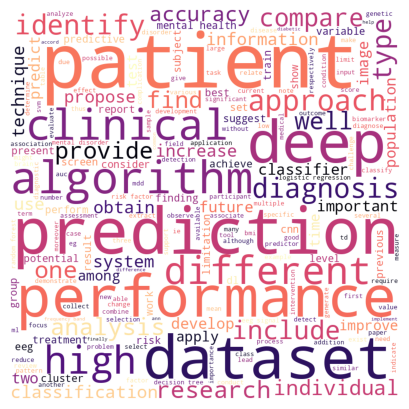

In [ ]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **END OF CODE**